<a href="https://colab.research.google.com/github/kamjelonek/Project_2_CLASS/blob/main/driver_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

In [46]:
def Plot_3D(X,y,a,b,c):

  X_show = np.array(X)
  y_show = np.array(y)

  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)
  ax = plt.axes(projection='3d')
  ax.scatter3D(X_show[:, a], X_show[:, b], X_show[:, c],c=y_show, edgecolor="k")
  return plt.show()

def Feature_2D(X,y):

  model_tsne = TSNE(n_components=2)

  X_show = np.array(X)
  y_show = np.array(y)

  X_tse=model_tsne.fit_transform(X_show)

  x1=X_tse[:,0]
  x2=X_tse[:,1]

  plt.figure(figsize=(8,8))
  plt.scatter(x1,x2,c=y_show)
  plt.show()

In [24]:
df = pd.read_csv('acquiredDataset.csv')
df.head()

# Attenction - Proprietary measure of mental focus from 0-100
# meditation - Proprietary measure of calmness from 0-100
# delta - 1-3 Hz of power spectrum
# theta - 4-7 Hz of power spectrum
# lowAlpha - Lower 8-11 Hz of power spectrum
# highAlpha - Higher 8-11 Hz of power spectrum
# lowBeta - Lower 12-29 Hz of power spectrum
# highBeta - Higher 12-29 Hz of power spectrum
# lowGamma - Lower 30-100 Hz of power spectrum
# highGamma - Higher 30-100 Hz of power spectrum
# classification - (0-yes/1-no? guess)

attention  meditation   delta   theta  lowAlpha  highAlpha  lowBeta  \
0         26          34  960462  277180     26575      27356    26575   
1         29          54   39145   28225     20172      39551    20172   
2         40          48   75410   43144      8601      13564     8601   
3         66          47   16057   41211      2534      34254     2534   
4         81          67   10304   47239     33158      47349    33158   

   highBeta  lowGamma  highGamma  classification  
0     13056      9126       2683               0  
1      9933      5237       4750               0  
2     11663      2515       3251               0  
3     27663     11396       2825               0  
4     16328      5298       5471               0

In [25]:
df.shape

(3735, 11)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


In [27]:
df['classification'].unique()

array([0, 1])

In [28]:
print('Duplicate rows:')
print(df.duplicated().sum())

Duplicate rows:
0


In [29]:
df.nunique()


attention           60
meditation          60
delta             3724
theta             3680
lowAlpha          3601
highAlpha         3561
lowBeta           3573
highBeta          3494
lowGamma          3259
highGamma         3651
classification       2
dtype: int64

In [30]:
nany = df.isna().sum()
print("Liczba brakujących wartości:")
print(nany)

Liczba brakujących wartości:
attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64


In [31]:
df.corr()

attention  meditation     delta     theta  lowAlpha  \
attention        1.000000    0.012465 -0.142241 -0.053082 -0.051414   
meditation       0.012465    1.000000 -0.075071 -0.081029  0.159976   
delta           -0.142241   -0.075071  1.000000  0.380921  0.363079   
theta           -0.053082   -0.081029  0.380921  1.000000  0.456296   
lowAlpha        -0.051414    0.159976  0.363079  0.456296  1.000000   
highAlpha        0.047367    0.015013  0.257987  0.656068  0.256059   
lowBeta          0.006725    0.009094  0.349557  0.344237  0.693183   
highBeta         0.166178    0.027394  0.225820  0.663608  0.437718   
lowGamma         0.059002   -0.097699  0.253741  0.285673  0.294094   
highGamma        0.032169    0.166853  0.287873  0.594448  0.444335   
classification   0.049283   -0.057642 -0.229921 -0.205588 -0.174786   

                highAlpha   lowBeta  highBeta  lowGamma  highGamma  \
attention        0.047367  0.006725  0.166178  0.059002   0.032169   
meditation       0.015013  0.009094  0.027394 -0.097699   0.166853   
delta            0.257987  0.349557  0.225820  0.253741   0.287873   
theta            0.656068  0.344237  0.663608  0.285673   0.594448   
lowAlpha         0.256059  0.693183  0.437718  0.294094   0.444335   
highAlpha        1.000000  0.271657  0.632582  0.281427   0.469033   
lowBeta          0.271657  1.000000  0.199992  0.403545   0.182727   
highBeta         0.632582  0.199992  1.000000  0.301577   0.650842   
lowGamma         0.281427  0.403545  0.301577  1.000000   0.027007   
highGamma        0.469033  0.182727  0.650842  0.027007   1.000000   
classification  -0.190926 -0.063340 -0.213560 -0.049076  -0.103819   

                classification  
attention             0.049283  
meditation           -0.057642  
delta                -0.229921  
theta                -0.205588  
lowAlpha             -0.174786  
highAlpha            -0.190926  
lowBeta              -0.063340  
highBeta             -0.213560  
lowGamma             -0.049076  
highGamma            -0.103819  
classification        1.000000

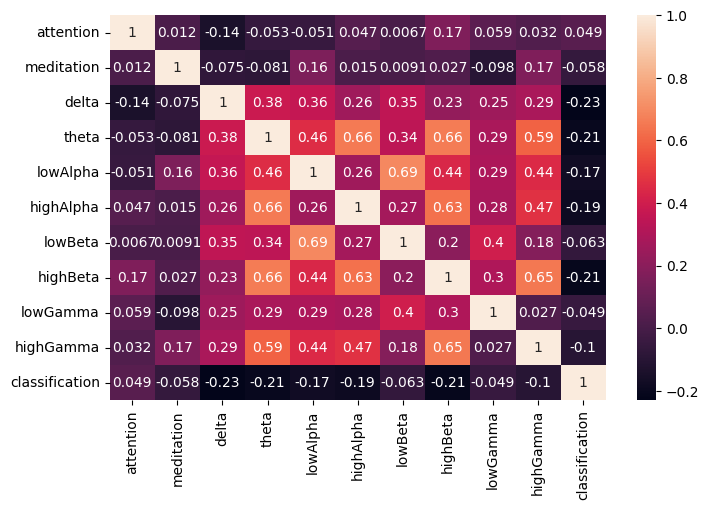

In [32]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [33]:
#from pandas.profiling import ProfileReport

In [34]:
#profile = ProfileReport(df)
#profile

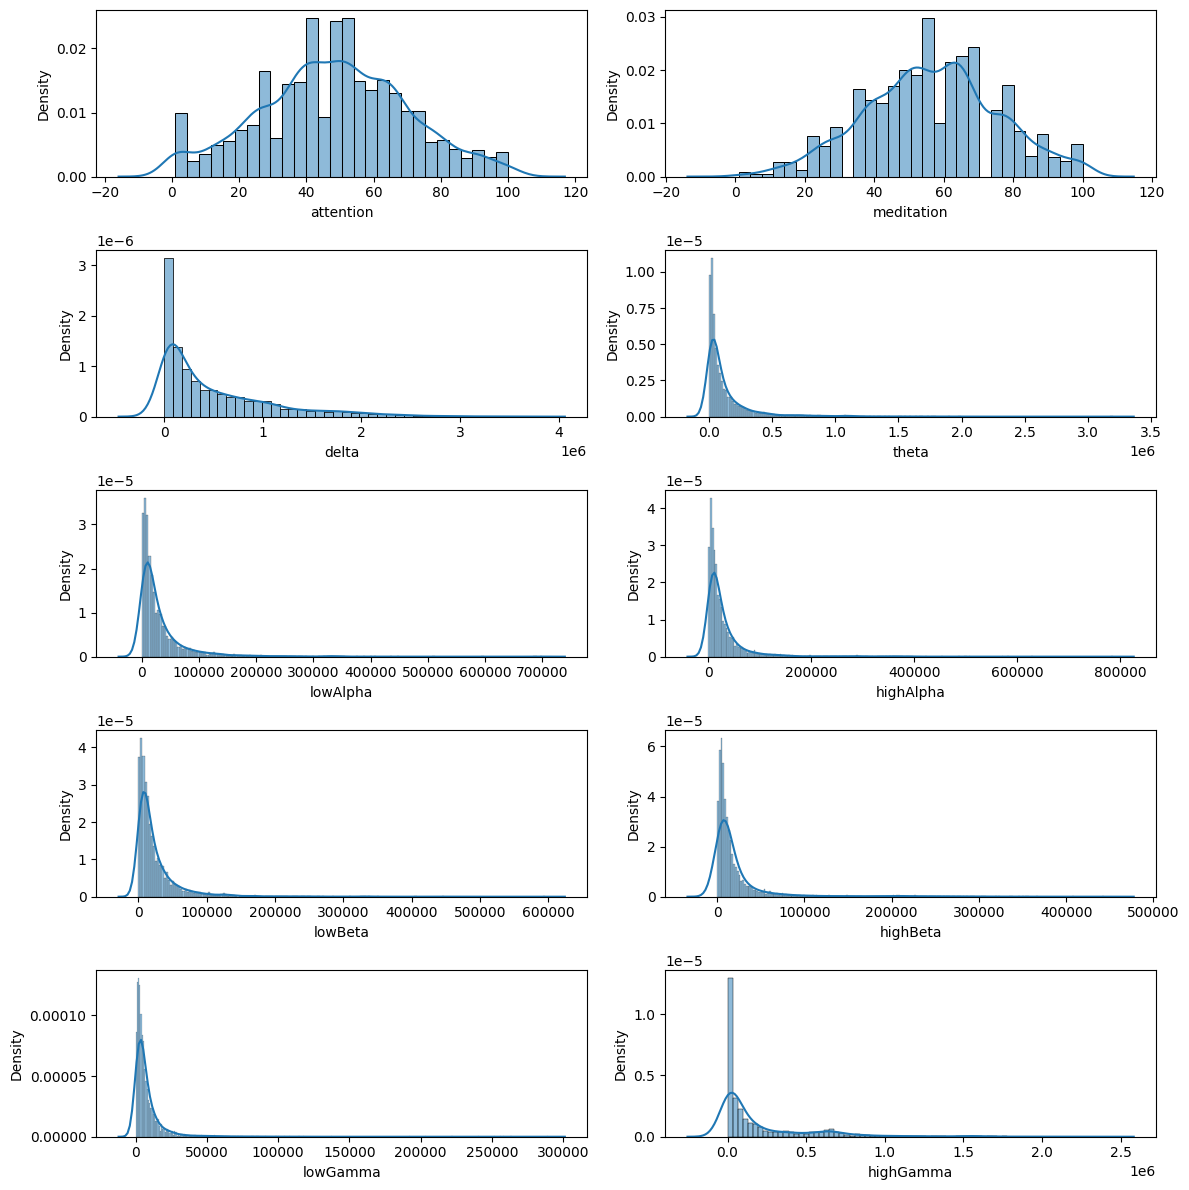

In [35]:
cols = list(df.columns)[0:len(df.columns)-1]
rows_plot = 5
cols_plot = 2
counter = 1
plt.rcParams["figure.figsize"] = [12, 12]
for col in cols:
    plt.subplot(rows_plot, cols_plot, counter)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=4))
    counter += 1
plt.tight_layout()
plt.show()

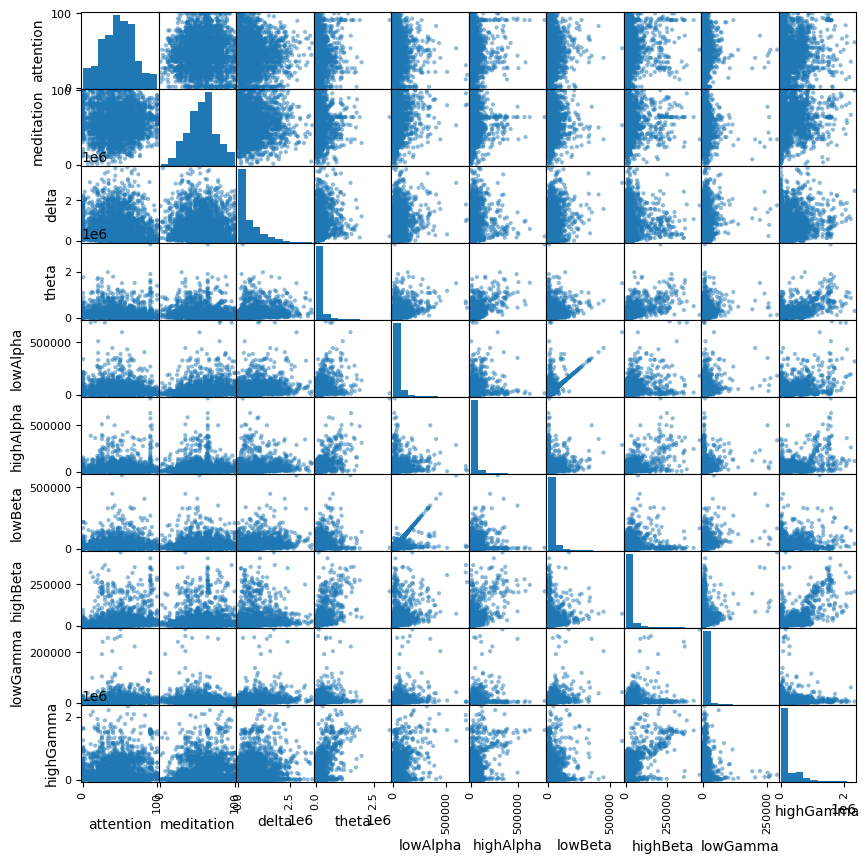

In [36]:
scatter_matrix(df.drop(columns = ["classification"]), figsize=(10, 10))
plt.show()

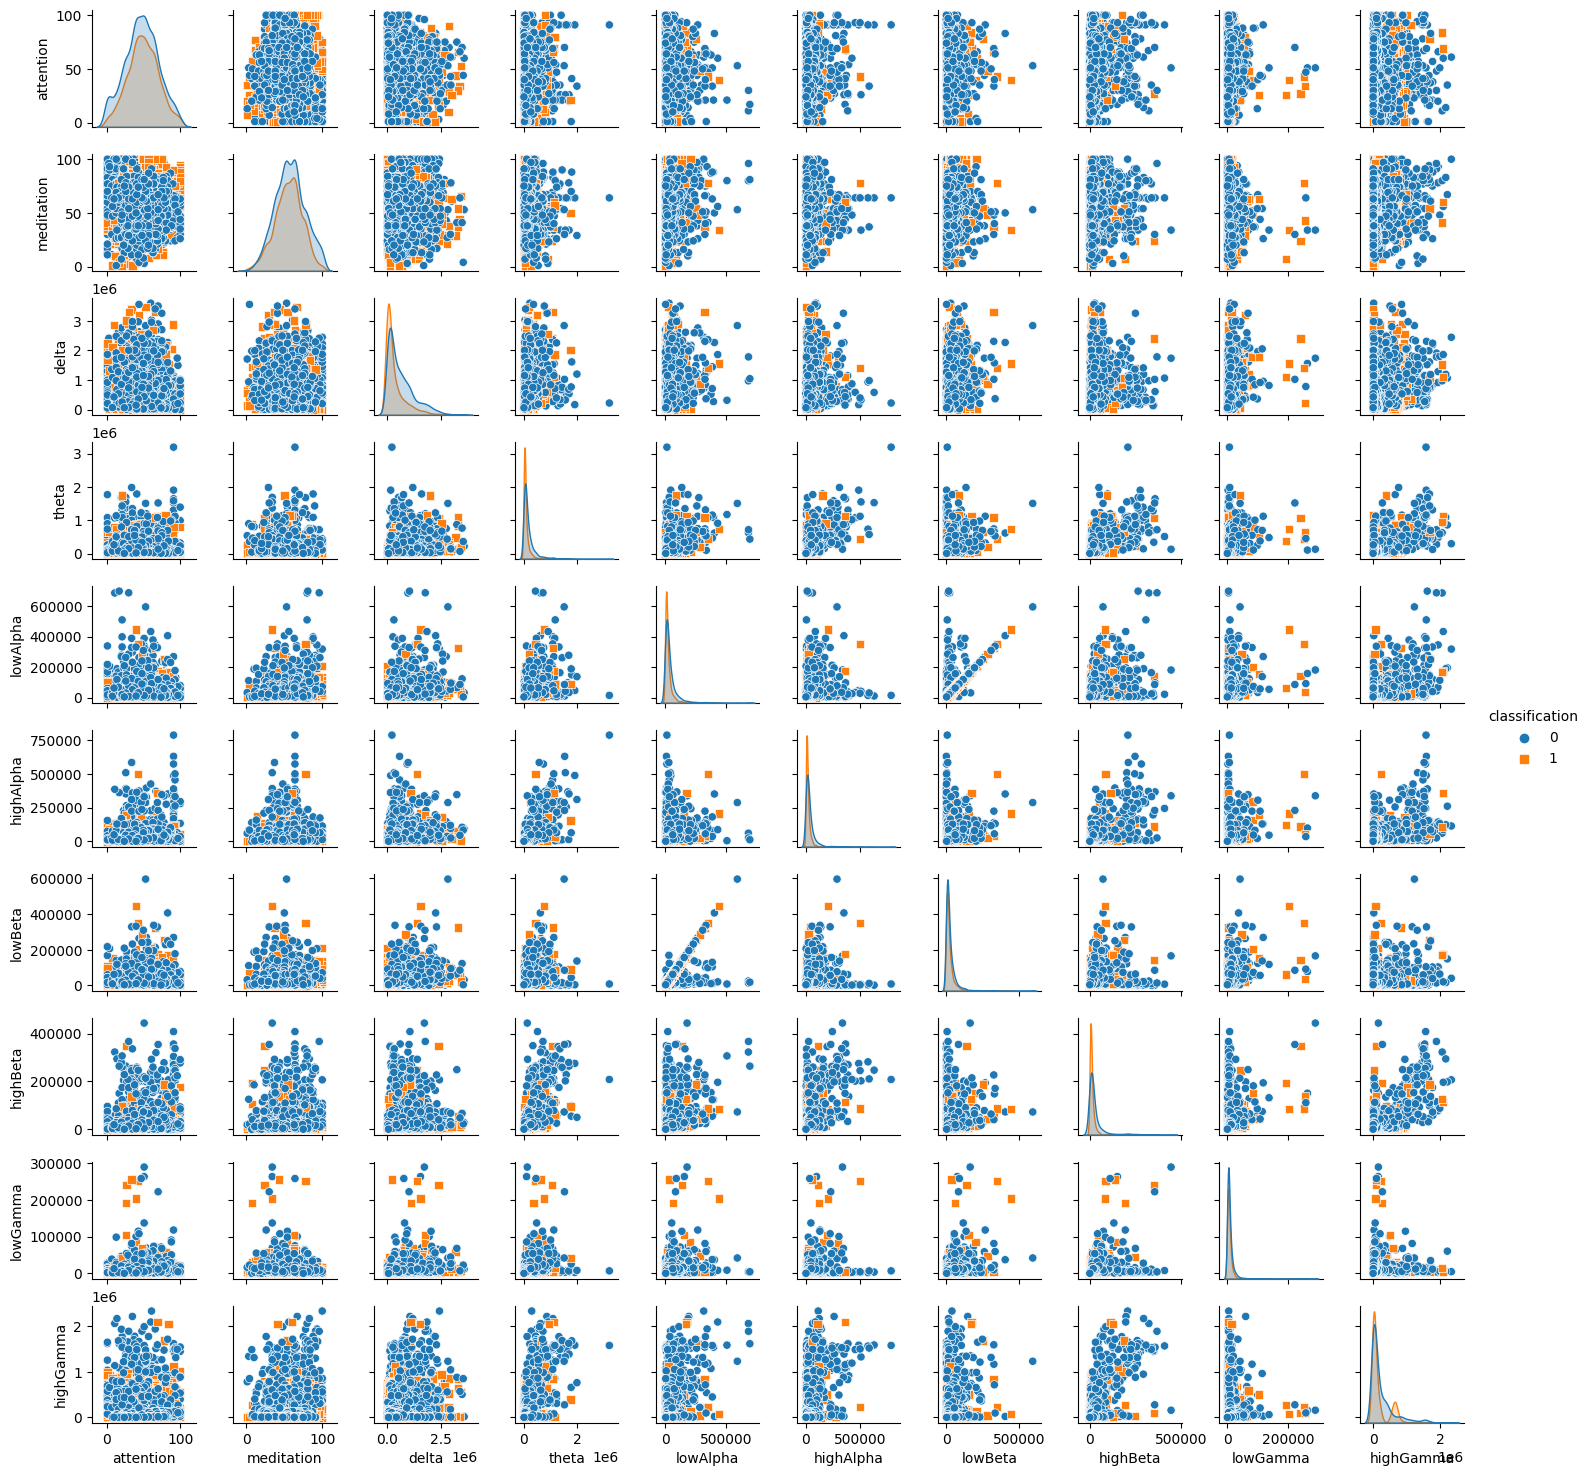

In [37]:
_ = sns.pairplot(df, hue='classification', diag_kind='kde', markers=['o', 's'], height=1.5, aspect=1)

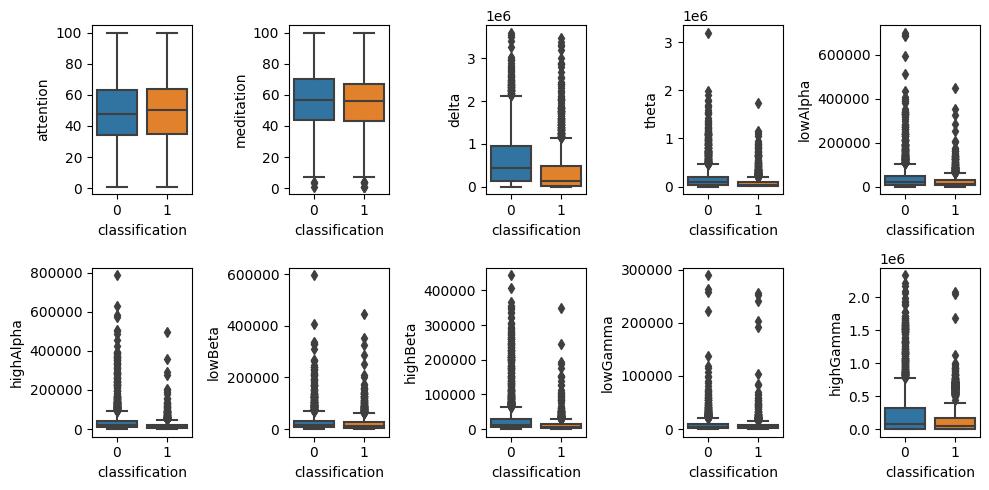

In [38]:
rows_plot=2
cols_plot=5
counter=1
plt.rcParams['figure.figsize']=[10,5]
for col in cols:
    plt.subplot(rows_plot,cols_plot,counter)
    sns.boxplot(x='classification',y=col,data=df)
    counter+=1

plt.tight_layout()
plt.show()

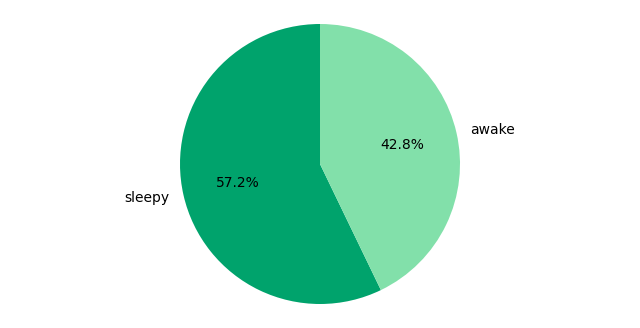

In [39]:
plt.figure(figsize=(8, 4))
plt.pie(df['classification'].value_counts(), labels=['sleepy', 'awake'], autopct='%1.1f%%', startangle=90, colors = ['#00A36C', '#82E0AA'])
plt.axis('equal')
plt.show()

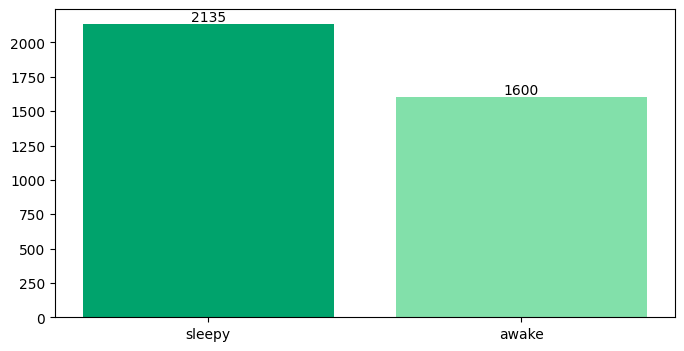

In [40]:
plt.figure(figsize=(8, 4))
ax = plt.gca()
bars = plt.bar(['sleepy', 'awake'], df['classification'].value_counts(), color=['#00A36C', '#82E0AA'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 0),
                textcoords="offset points", ha='center', va='bottom')

Text(0.5, 1.0, 'Sleepy/Awake vs Different Wave Frequency')

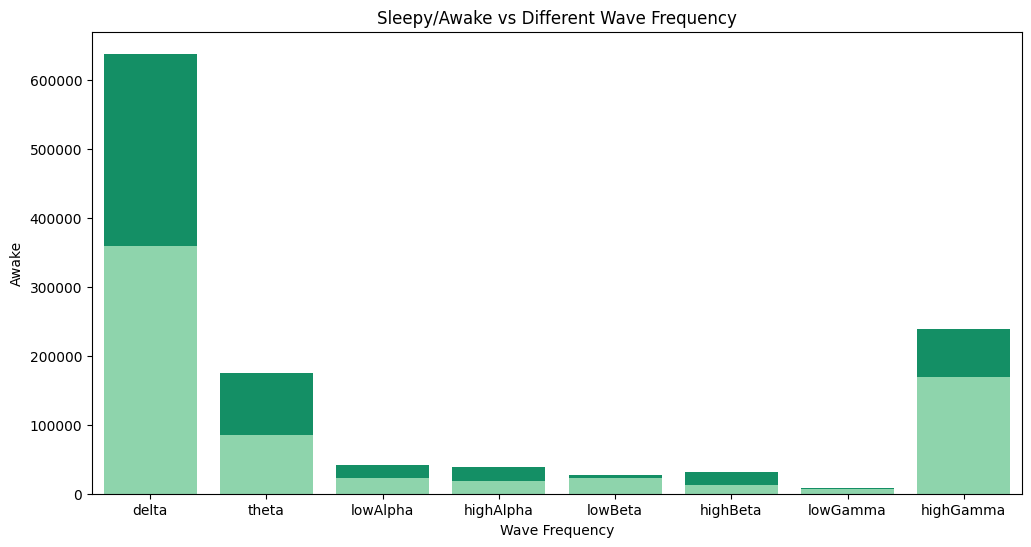

In [41]:
state_means = df.groupby('classification')[['delta', 'theta', 'lowAlpha', 'highAlpha','lowBeta', 'highBeta', 'lowGamma', 'highGamma']].mean()

state_means = state_means.T.reset_index()

state_means.columns = ['Wave Frequency', 'Sleepy', 'Awake']

state_band = ['delta', 'theta', 'lowAlpha', 'highAlpha','lowBeta', 'highBeta', 'lowGamma', 'highGamma']

state_means = state_means[state_means['Wave Frequency'].isin(state_band)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Wave Frequency', y='Sleepy', data=state_means, color='#00A36C', label='Sleepy')
sns.barplot(x='Wave Frequency', y='Awake', data=state_means, color='#82E0AA', label='Awake')
plt.title('Sleepy/Awake vs Different Wave Frequency')

# Selekcja modeli

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

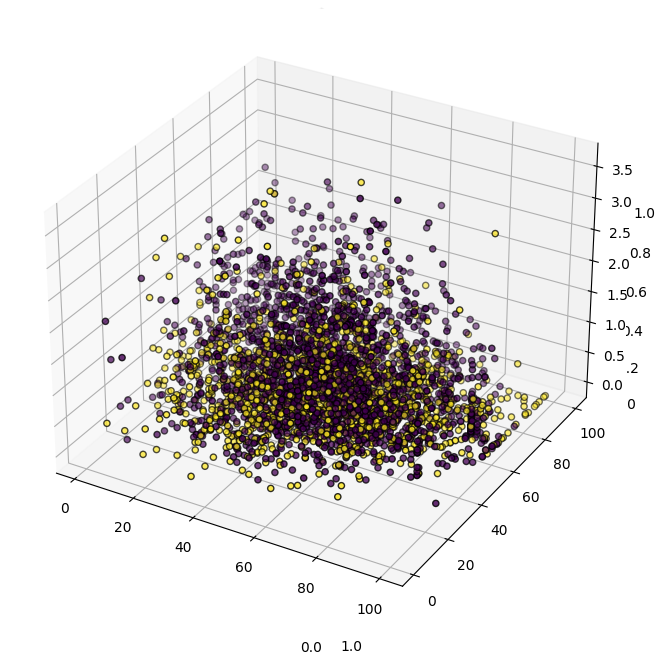

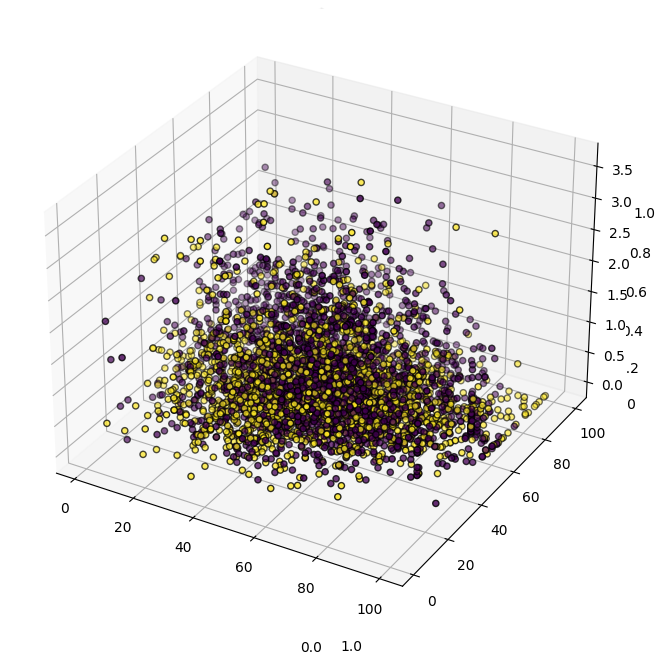

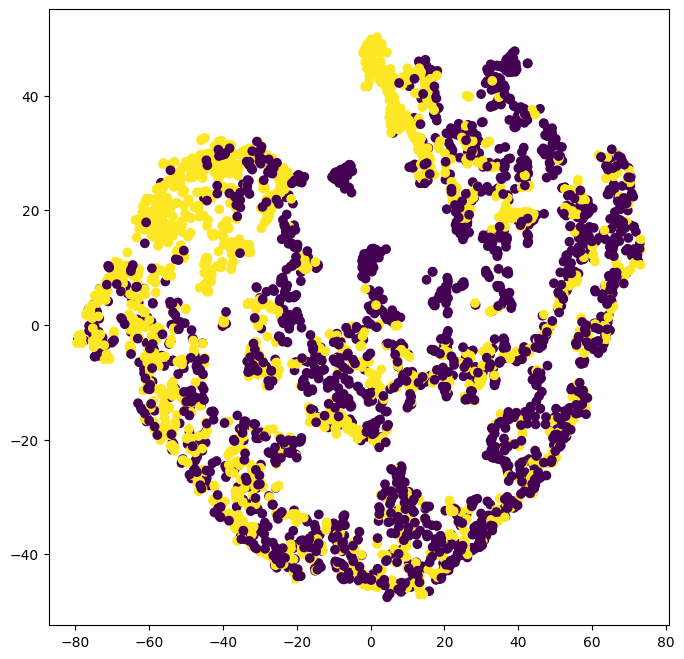

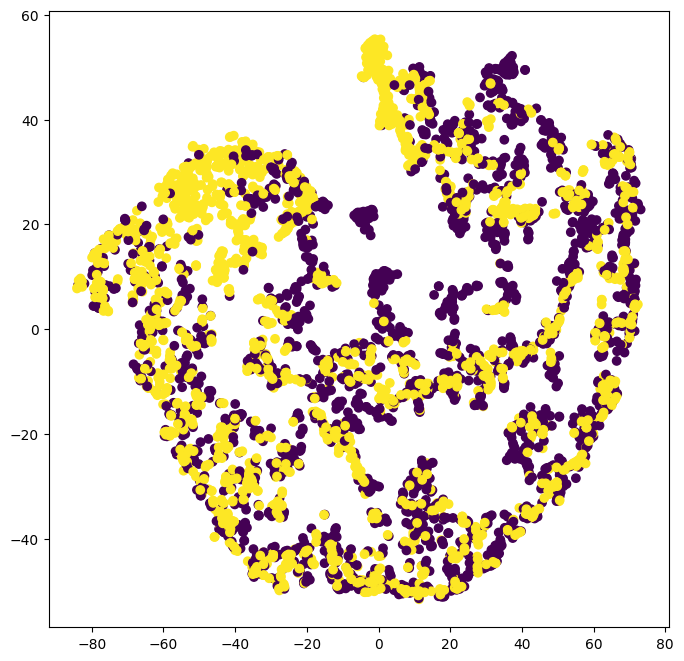

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority', random_state=42)

X = df.drop(columns = ['classification'])
y = df['classification']

X_res_ada, y_res_ada = ada.fit_resample(X,y)

X_trainval, X_test, y_trainval, y_test = train_test_split(X_res_ada, y_res_ada, test_size=0.15, stratify=y_res_ada, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, stratify=y_trainval, random_state=42)

model_knn = KNeighborsClassifier()
model_svc = SVC(random_state=42)
model_tree = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_logreg = LogisticRegression(random_state=42)
model_logregCV = LogisticRegressionCV(random_state=42)
model_brf = GradientBoostingClassifier(random_state=42)
model_gauss = GaussianNB()
model_mlp = MLPClassifier(random_state=42)

models = {0: model_knn,
          1: model_svc,
          2: model_tree,
          3: model_rf,
          4: model_brf,
          5: model_logreg,
          6: model_logregCV,
          7: model_gauss,
          8: model_mlp}

results = {"model": [],
           "accuracy": [],
           "precision": [],
           "recall": [],
           "f1-score (macro)": [],
           "mcc-score": []}

matrixs = []

for m in range(len(models)):
  models[m].fit(X_train,y_train)
  y_pred = models[m].predict(X_val)
  results["model"].append(models[m])
  results["accuracy"].append(accuracy_score(y_val,y_pred))
  results["precision"].append(precision_score(y_val,y_pred))
  results["recall"].append(recall_score(y_val,y_pred))
  results["f1-score (macro)"].append(f1_score(y_val,y_pred,average="macro"))
  results["mcc-score"].append(matthews_corrcoef(y_val,y_pred))
  matrixs.append(confusion_matrix(y_val,y_pred))

Plot_3D(X,y,0,1,2)
Plot_3D(X_res_ada,y_res_ada,0,1,2)
Feature_2D(X,y)
Feature_2D(X_res_ada,y_res_ada)

X.shape: (4309, 10)
X_train.shape: (3112, 10)
X_test.shape: (647, 10)
X_val.shape: (550, 10)


model  accuracy  precision  \
0                             KNeighborsClassifier()  0.674545   0.653251   
1                               SVC(random_state=42)  0.616364   0.624535   
2            DecisionTreeClassifier(random_state=42)  0.736364   0.743590   
3  (DecisionTreeClassifier(max_features='sqrt', r...  0.807273   0.790541   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  0.740000   0.722772   
5                LogisticRegression(random_state=42)  0.629091   0.660870   
6              LogisticRegressionCV(random_state=42)  0.663636   0.656566   
7                                       GaussianNB()  0.574545   0.547210   
8                     MLPClassifier(random_state=42)  0.610909   0.735294   

     recall  f1-score (macro)  mcc-score  
0  0.758993          0.671723   0.352620  
1  0.604317          0.616352   0.233035  
2  0.730216          0.736363   0.472847  
3  0.841727          0.806905   0.615546  
4  0.787770          0.739171   0.481420  
5  0.546763          0.626915   0.263535  
6  0.701439          0.662940   0.327469  
7  0.917266          0.514090   0.196710  
8  0.359712          0.585569   0.263481

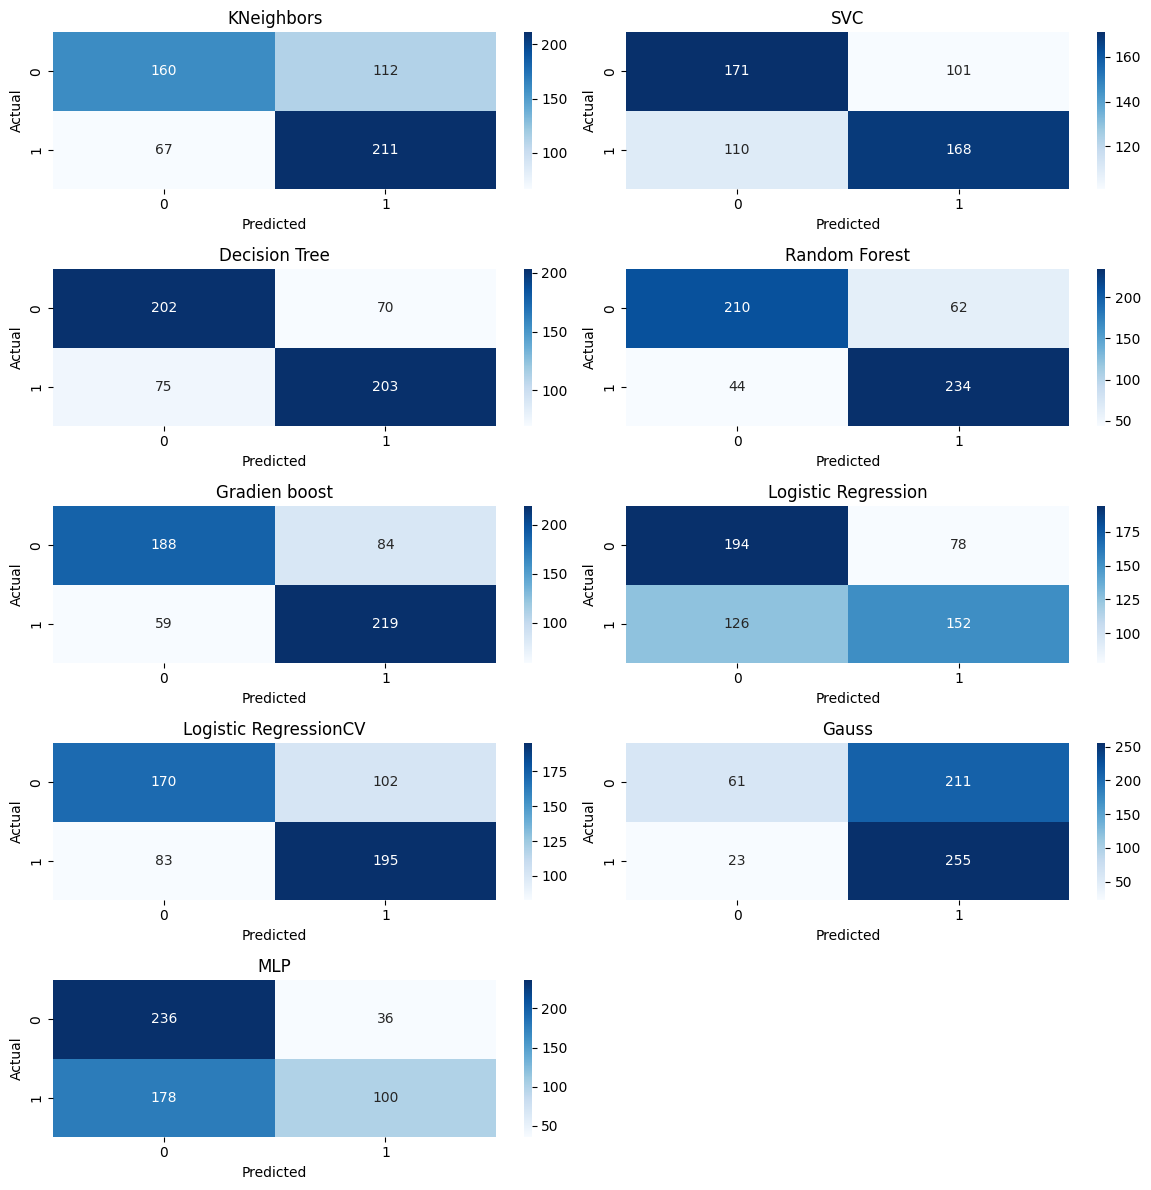

In [52]:
print(f"X.shape: {X_res_ada.shape}")
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'X_val.shape: {X_val.shape}')

df_results = pd.DataFrame(results)
display(df_results)

titles = {1: "KNeighbors",
          2: "SVC",
          3: "Decision Tree",
          4: "Random Forest",
          5: "Gradien boost",
          6: "Logistic Regression",
          7: "Logistic RegressionCV",
          8: "Gauss",
          9: "MLP"}

rows_plot = 5
cols_plot = 2
counter = 0
plt.rcParams["figure.figsize"] = [12, 12]
for matrix in matrixs:
    counter += 1
    plt.subplot(rows_plot, cols_plot, counter)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(titles[counter])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
plt.show()

# KNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


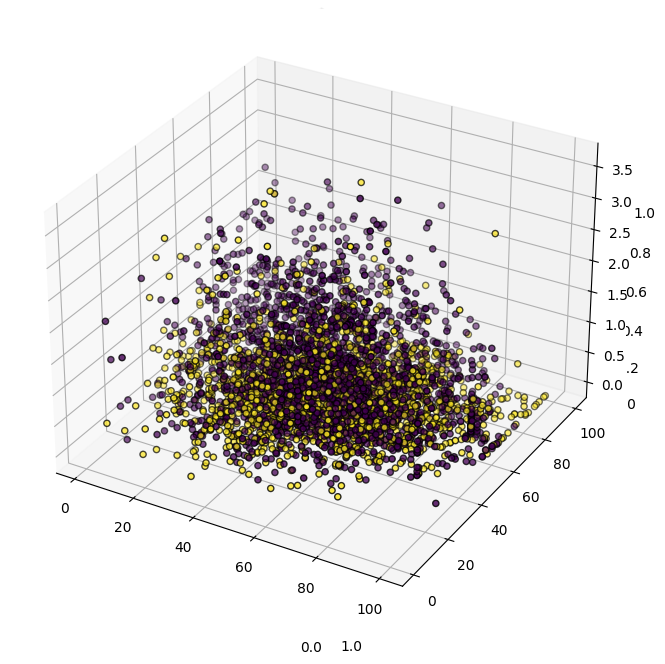

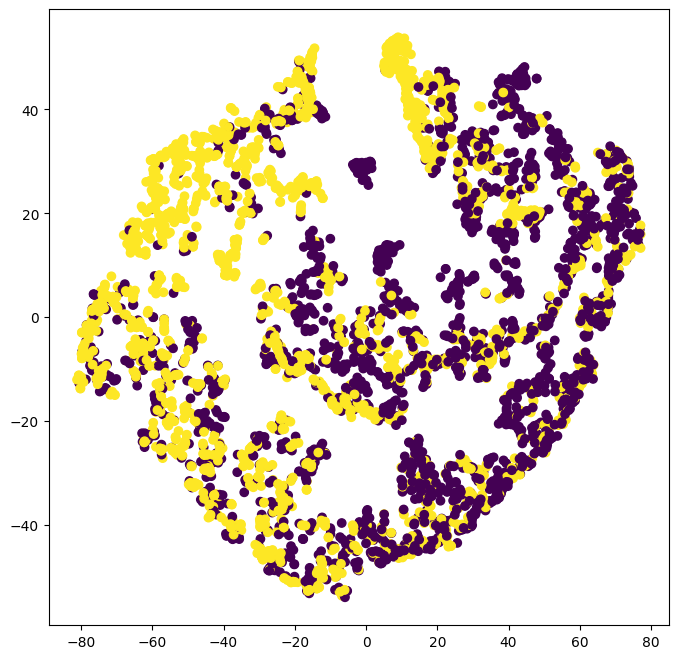

In [54]:
from imblearn.over_sampling import KMeansSMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

km = KMeansSMOTE(random_state=42)

params = {"n_neighbors": [3,5,7,9,11],
          "algorithm": ["ball_tree","kd_tree","brute"],
          "leaf_size": [15,30,45],
          "p": [1,2]}

gs_kn = GridSearchCV(KNeighborsClassifier(),
                  param_grid=params,
                  cv=10,
                  scoring="f1_macro")

X_res_km, y_res_km = km.fit_resample(X,y)

X_trainval_km, X_test_km, y_trainval_km, y_test_km = train_test_split(X_res_km, y_res_km, test_size=0.15, stratify=y_res_km, random_state=42)
X_train_km, X_val_km, y_train_km, y_val_km = train_test_split(X_trainval_km, y_trainval_km, test_size=0.15, stratify=y_trainval_km, random_state=42)

gs.fit(X_train_km,y_train_km)

Plot_3D(X_res_km,y_res_km,0,1,2)

Feature_2D(X_res_km,y_res_km)

Accuracy score: 0.7761467889908257
Precision score: 0.8073770491803278
Recall score: 0.7242647058823529
matt_score: 0.5551471842852159
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       273
           1       0.81      0.72      0.76       272

    accuracy                           0.78       545
   macro avg       0.78      0.78      0.78       545
weighted avg       0.78      0.78      0.78       545



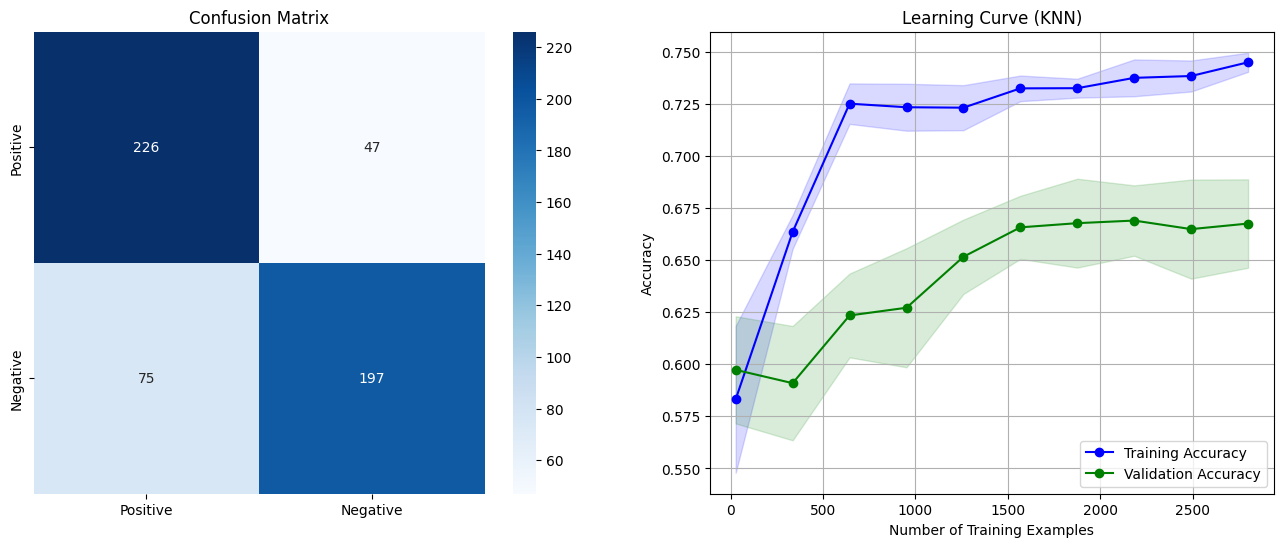

In [56]:
model_kn = KNeighborsClassifier(n_neighbors=gs.best_params_["n_neighbors"],
                                algorithm=gs.best_params_["algorithm"],
                                leaf_size=gs.best_params_["leaf_size"],
                                p=gs.best_params_["p"])

model_kn.fit(X_train_km, y_train_km)

y_pred_kn = model_kn.predict(X_val_km)

print(f"Accuracy score: {accuracy_score(y_val_km,y_pred_kn)}")
print(f"Precision score: {precision_score(y_val_km,y_pred_kn)}")
print(f"Recall score: {recall_score(y_val_km,y_pred_kn)}")
print(f"matt_score: {matthews_corrcoef(y_val_km,y_pred_kn)}")
matrix_kn = confusion_matrix(y_val_km,y_pred_kn)

print(classification_report(y_val_km,y_pred_kn))

train_sizes, train_scores, test_scores = learning_curve(model_kn,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(matrix_kn, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

# Random Forest

In [57]:
params_rf = {"n_estimators": [150,250],
          "criterion": ["gini","entropy"],
          "max_depth": [25,35],
          "min_samples_split": [5,15],
          "min_samples_leaf": [5,15]}

gs_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                  param_grid=params_rf,
                  cv=10,
                  scoring="f1_macro",
                  verbose=2)

gs_rf.fit(X_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.2s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.5s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.8s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.2s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.2s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.2s
[CV] END criterion=gini, max_depth=25, min_samples_leaf=5, min_samples_split=5, n_estimators=150; total time=   1.3s
[

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 35], 'min_samples_leaf': [5, 15],
                         'min_samples_split': [5, 15],
                         'n_estimators': [150, 250]},
             scoring='f1_macro', verbose=2)

In [58]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 250}

Accuracy score: 0.7
Precision score: 0.728744939271255
Recall score: 0.6474820143884892
matt_score: 0.40323019104248464
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       272
           1       0.73      0.65      0.69       278

    accuracy                           0.70       550
   macro avg       0.70      0.70      0.70       550
weighted avg       0.70      0.70      0.70       550



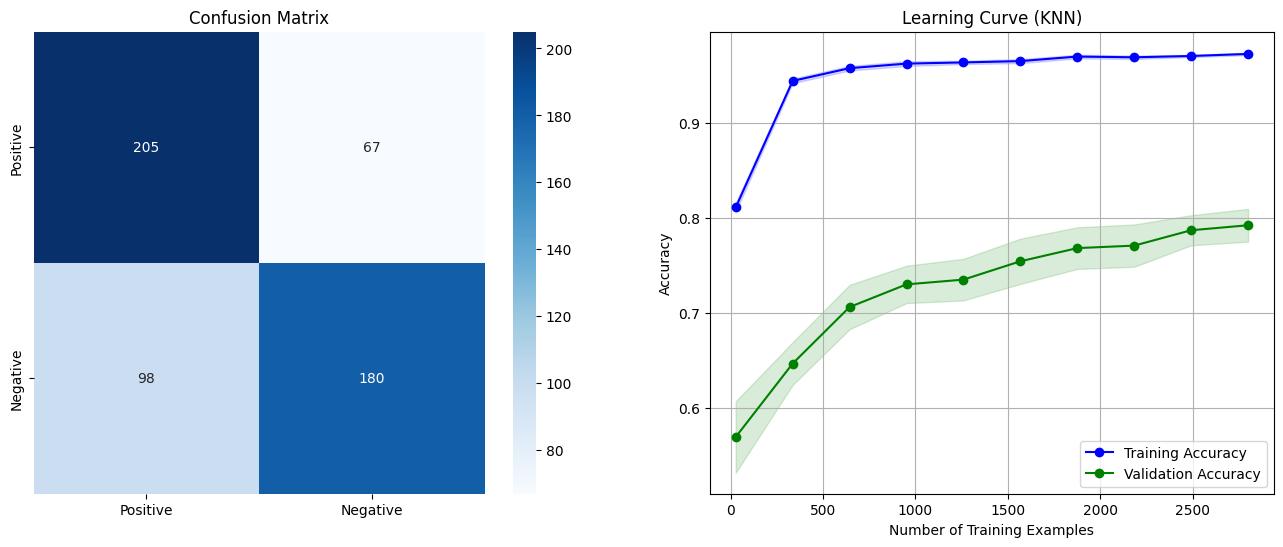

In [62]:
model_rf = RandomForestClassifier(criterion=gs_rf.best_params_['criterion'],
                                  max_depth=gs_rf.best_params_['max_depth'],
                                  min_samples_leaf=gs_rf.best_params_['min_samples_leaf'],
                                  min_samples_split=gs_rf.best_params_['min_samples_split'],
                                  n_estimators=gs_rf.best_params_['n_estimators'],
                                  random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_kn.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_rf)}")
print(f"Precision score: {precision_score(y_val,y_pred_rf)}")
print(f"Recall score: {recall_score(y_val,y_pred_rf)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_rf)}")
matrix_rf = confusion_matrix(y_val,y_pred_rf)

print(classification_report(y_val,y_pred_rf))

train_sizes, train_scores, test_scores = learning_curve(model_rf,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(matrix_rf, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

# XGBoost

In [75]:
from xgboost import XGBClassifier

params_xgb = {"n_estimators": [150,250],
              "max_depth": [25,35],
              "learning_rate": [0.1,0.3,0.8],}

gs_xgb = GridSearchCV(XGBClassifier(random_state=42,objective="binary:logistic",eval_metric="auc"),
                  param_grid=params_xgb,
                  cv=10,
                  scoring="f1_macro",
                  verbose=2)

gs_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   3.7s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   2.7s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.6s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   2.9s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=25, n_estimators=250; total time=   1.3s
[CV] END ..learning_rate=0.1, max_depth=25, n_

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.8],
                         'max_depth': [25, 35], 'n_estimators': [150, 250]},
             scoring='f1_macro', verbose=2)

Accuracy score: 0.8181818181818182
Precision score: 0.8068965517241379
Recall score: 0.841726618705036
matt_score: 0.6367543727939629
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       272
           1       0.81      0.84      0.82       278

    accuracy                           0.82       550
   macro avg       0.82      0.82      0.82       550
weighted avg       0.82      0.82      0.82       550



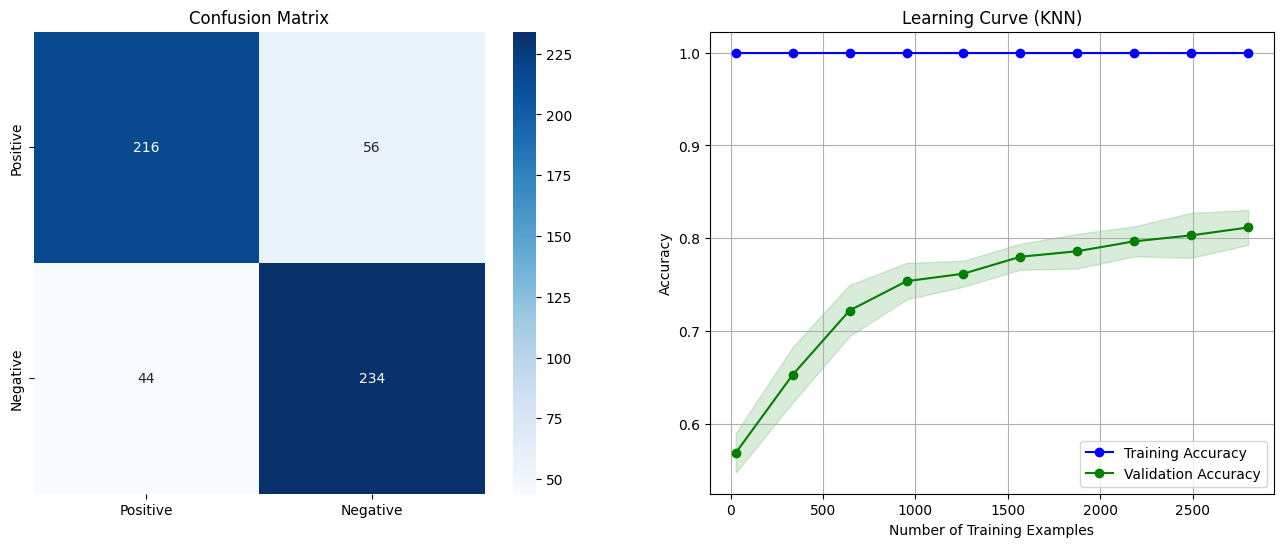

In [77]:
model_xgb = XGBClassifier(max_depth=gs_xgb.best_params_["max_depth"],
                          n_estimators=gs_xgb.best_params_["n_estimators"],
                          learning_rate=gs_xgb.best_params_["learning_rate"],
                          objective="binary:logistic",
                          eval_metric="auc",
                          random_state=42)

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_val)

print(f"Accuracy score: {accuracy_score(y_val,y_pred_xgb)}")
print(f"Precision score: {precision_score(y_val,y_pred_xgb)}")
print(f"Recall score: {recall_score(y_val,y_pred_xgb)}")
print(f"matt_score: {matthews_corrcoef(y_val,y_pred_xgb)}")
matrix_xgb = confusion_matrix(y_val,y_pred_xgb)

print(classification_report(y_val,y_pred_xgb))

train_sizes, train_scores, test_scores = learning_curve(model_xgb,X_train, y_train,
                                                        cv=10, scoring='f1_macro',
                                                        train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

sns.heatmap(matrix_xgb, annot=True, cmap='Blues', fmt='g', ax=ax1,
            xticklabels=["Positive","Negative"],
            yticklabels=["Positive","Negative"])
ax1.set_title("Confusion Matrix")

ax2.plot(train_sizes, train_mean, label='Training Accuracy', marker='o', color='blue')
ax2.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
ax2.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='green')
ax2.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
ax2.set_title('Learning Curve (KNN)')
ax2.set_xlabel('Number of Training Examples')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.show()

## LOGISTIC REGRESSION

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2988, 10)
y_train shape: (2988,)
X_test shape: (747, 10)
y_test shape: (747,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#display(scaler.mean_)
#display(scaler.scale_)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)
y_pred[:20]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:20]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred)

In [ ]:
report_lr = classification_report(y_test, y_pred)

In [ ]:
Scores_lr = {'Accuracy':round(accuracy_score(y_test, y_pred),3),
          'F1_score':round(f1_score(y_test, y_pred),3),
          'Recall':round(recall_score(y_test, y_pred),3),
          'Precision':round(precision_score(y_test, y_pred),3)}
df_lr=pd.DataFrame(data=Scores_lr,index=['LogisticRegression'])
df_lr

Accuracy  F1_score  Recall  Precision
LogisticRegression     0.631     0.361   0.244      0.696

Accuracy LOG: 0.6305220883534136
Classification Report LOG:
               precision    recall  f1-score   support

           0       0.62      0.92      0.74       427
           1       0.70      0.24      0.36       320

    accuracy                           0.63       747
   macro avg       0.66      0.58      0.55       747
weighted avg       0.65      0.63      0.58       747

Confusion Matrix LOG:
 [[393  34]
 [242  78]]


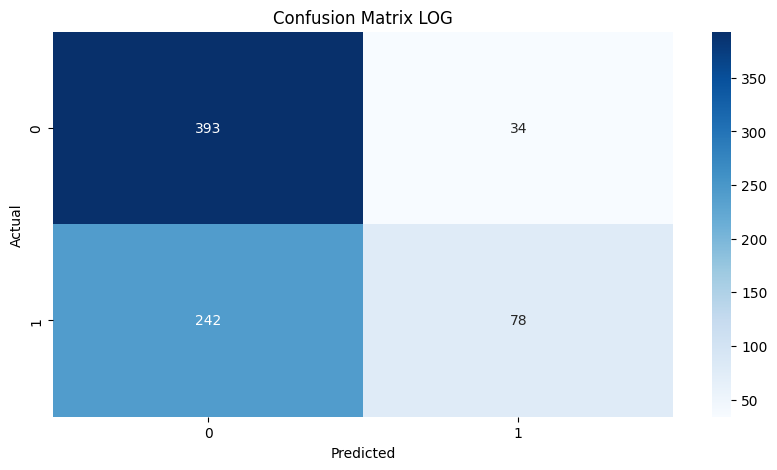

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred)

print(f'Accuracy LOG: {accuracy_lr}')
print('Classification Report LOG:\n', report_lr)
print('Confusion Matrix LOG:\n', conf_matrix_lr)

conf_matrix_lr = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LOG')
plt.show()

## KNN



In [ ]:
X = df[["attention", "meditation", "delta", "theta", "lowAlpha", "highAlpha", "lowBeta", "highBeta", "lowGamma", "highGamma"]]
y = df['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_kn_pred = kn_classifier.predict(X_test)

In [ ]:
accuracy_kn = accuracy_score(y_test, y_kn_pred)

In [ ]:
report_kn = classification_report(y_test, y_kn_pred)

In [ ]:
Scores_kn = {'Accuracy':round(accuracy_score(y_test, y_kn_pred),3),
          'F1_score':round(f1_score(y_test, y_kn_pred),3),
          'Recall':round(recall_score(y_test, y_kn_pred),3),
          'Precision':round(precision_score(y_test, y_kn_pred),3)}
df_kn=pd.DataFrame(data=Scores_kn,index=['KNN'])
df_kn

Accuracy  F1_score  Recall  Precision
KNN     0.708     0.664   0.696      0.634

Accuracy KNN: 0.7081659973226239
Classification Report KNN:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74       438
           1       0.63      0.70      0.66       309

    accuracy                           0.71       747
   macro avg       0.70      0.71      0.70       747
weighted avg       0.71      0.71      0.71       747

Confusion Matrix KNN:
 [[314 124]
 [ 94 215]]


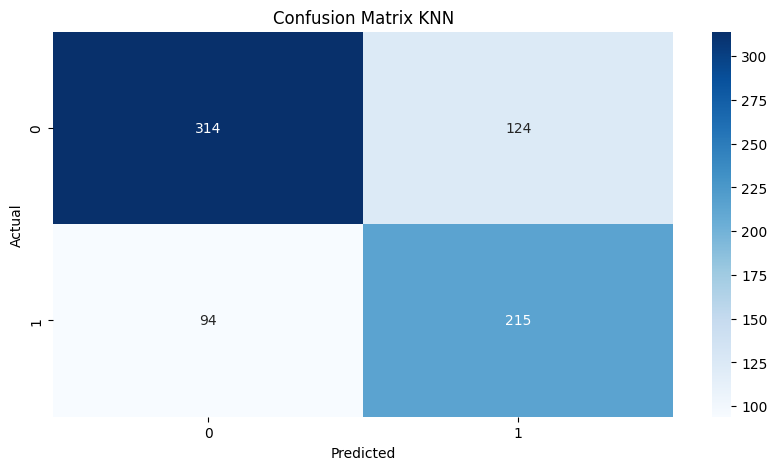

In [ ]:
conf_matrix_kn = confusion_matrix(y_test, y_kn_pred)

print(f'Accuracy KNN: {accuracy_kn}')
print('Classification Report KNN:\n', report_kn)
print('Confusion Matrix KNN:\n', conf_matrix_kn)

sns.heatmap(conf_matrix_kn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

In [ ]:
#krzywa walidacji krzyżowej i KNN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(knn_classifier, X_train, y_train, cv = 15)
scores

array([0.69      , 0.73      , 0.715     , 0.66331658, 0.75376884,
       0.72361809, 0.69346734, 0.66834171, 0.69346734, 0.69849246,
       0.68844221, 0.67839196, 0.69849246, 0.70351759, 0.70854271])

In [ ]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.7005 (+/- 0.0228)


In [ ]:
scores_df = pd.DataFrame({'Accuracy': scores})

In [ ]:
fig = px.bar(scores_df, y='Accuracy', color='Accuracy', width=700, height=400,
       title=f'Walidacja krzyżowa (15 podziałów) | Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min() - 0.01, 1.0])

fig.show()

## Drzewo decyzyjne

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend import plotting

d_tree = DecisionTreeClassifier(random_state=42, max_depth=3,criterion='gini').fit(X_train, y_train)

[Text(0.5, 0.875, 'x[2] <= 32716.0\ngini = 0.491\nsamples = 2988\nvalue = [1697, 1291]'),
 Text(0.25, 0.625, 'x[9] <= 176835.5\ngini = 0.357\nsamples = 478\nvalue = [111, 367]'),
 Text(0.125, 0.375, 'x[9] <= 8778.5\ngini = 0.3\nsamples = 436\nvalue = [80, 356]'),
 Text(0.0625, 0.125, 'gini = 0.468\nsamples = 107\nvalue = [40, 67]'),
 Text(0.1875, 0.125, 'gini = 0.214\nsamples = 329\nvalue = [40, 289]'),
 Text(0.375, 0.375, 'x[9] <= 531178.5\ngini = 0.387\nsamples = 42\nvalue = [31, 11]'),
 Text(0.3125, 0.125, 'gini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.75, 0.625, 'x[7] <= 16445.5\ngini = 0.465\nsamples = 2510\nvalue = [1586, 924]'),
 Text(0.625, 0.375, 'x[9] <= 577638.0\ngini = 0.493\nsamples = 1652\nvalue = [921, 731]'),
 Text(0.5625, 0.125, 'gini = 0.475\nsamples = 1485\nvalue = [909, 576]'),
 Text(0.6875, 0.125, 'gini = 0.133\nsamples = 167\nvalue = [12, 155]'),
 Text(0.875, 0.375, 'x[7] <= 54565.5\ngini 

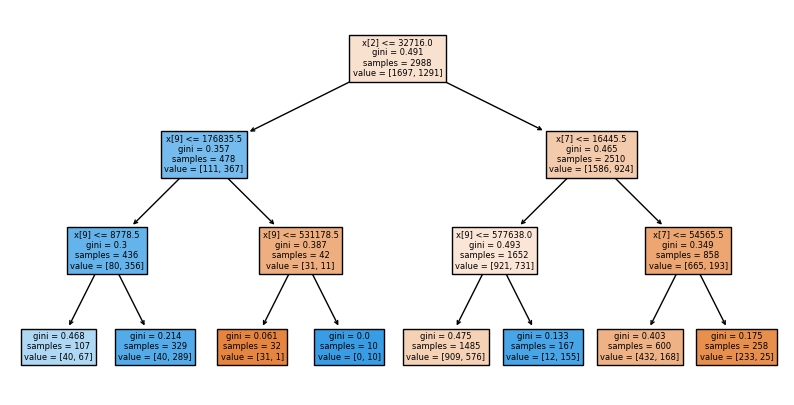

In [ ]:
plot_tree(d_tree,filled=True)

In [ ]:
d_tree.feature_importances_

array([0.        , 0.        , 0.3891673 , 0.        , 0.        ,
       0.        , 0.        , 0.198883  , 0.        , 0.41194971])

In [ ]:
y_pred_tree = d_tree.predict(X_test)

In [ ]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)

In [ ]:
report_tree = classification_report(y_test, y_pred_tree)

In [ ]:
Scores_tree = {'Accuracy':round(accuracy_score(y_test, y_pred_tree),3),
          'F1_score':round(f1_score(y_test, y_pred_tree),3),
          'Recall':round(recall_score(y_test, y_pred_tree),3),
          'Precision':round(precision_score(y_test, y_pred_tree),3)}
df_tree=pd.DataFrame(data=Scores_tree,index=['DecisionTree'])
df_tree

Accuracy  F1_score  Recall  Precision
DecisionTree     0.711     0.528   0.392      0.812

Accuracy TREE: 0.7108433734939759
Classification Report TREE:
               precision    recall  f1-score   support

           0       0.69      0.94      0.79       438
           1       0.81      0.39      0.53       309

    accuracy                           0.71       747
   macro avg       0.75      0.66      0.66       747
weighted avg       0.74      0.71      0.68       747

Confusion Matrix TREE:
 [[410  28]
 [188 121]]


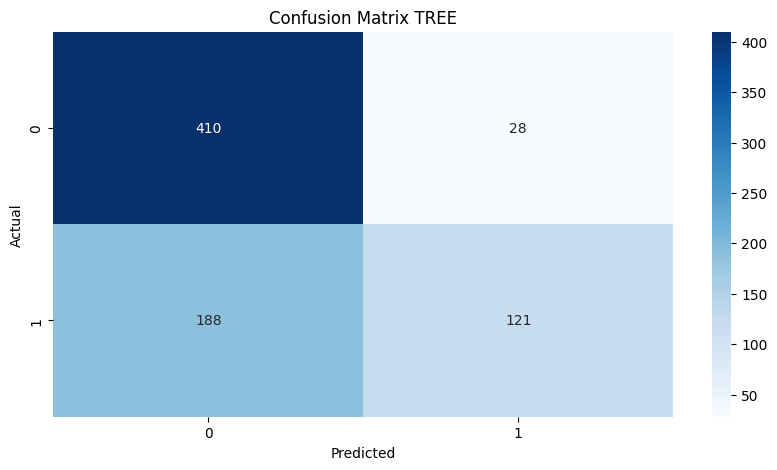

In [ ]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

print(f'Accuracy TREE: {accuracy_tree}')
print('Classification Report TREE:\n', report_tree)
print('Confusion Matrix TREE:\n', conf_matrix_tree)

sns.heatmap(conf_matrix_tree, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix TREE')
plt.show()

## RANDOM FOREST

In [ ]:
from sklearn.model_selection import GridSearchCV

X = df[["attention", "meditation", "delta", "theta", "lowAlpha", "highAlpha", "lowBeta", "highBeta", "lowGamma", "highGamma"]]
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [3, 9, 15],
              'min_samples_leaf':[5, 15, 45],
              'min_samples_split': [5, 15, 45],
              'criterion': ['entropy']}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 9, 15],
                         'min_samples_leaf': [5, 15, 45],
                         'min_samples_split': [5, 15, 45],
                         'n_estimators': [50, 100, 150]})

In [ ]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100,min_samples_split=5,min_samples_leaf=5,
                                       max_depth=15,criterion="gini")

rf_classifier = rf_classifier.fit(X_train, y_train)

y_rf_pred = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_rf_pred)

report_rf = classification_report(y_test, y_rf_pred)

Scores_rf = {'Accuracy':round(accuracy_score(y_test, y_rf_pred),3),
          'F1_score':round(f1_score(y_test, y_rf_pred),3),
          'Recall':round(recall_score(y_test, y_rf_pred),3),
          'Precision':round(precision_score(y_test, y_rf_pred),3)}
df_rf=pd.DataFrame(data=Scores_rf,index=['RandomForest'])
df_rf

Accuracy  F1_score  Recall  Precision
RandomForest     0.793     0.739   0.712      0.769

Accuracy RF: 0.7925033467202142
Classification Report RF:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       438
           1       0.77      0.71      0.74       309

    accuracy                           0.79       747
   macro avg       0.79      0.78      0.78       747
weighted avg       0.79      0.79      0.79       747

Confusion Matrix RF:
 [[372  66]
 [ 89 220]]


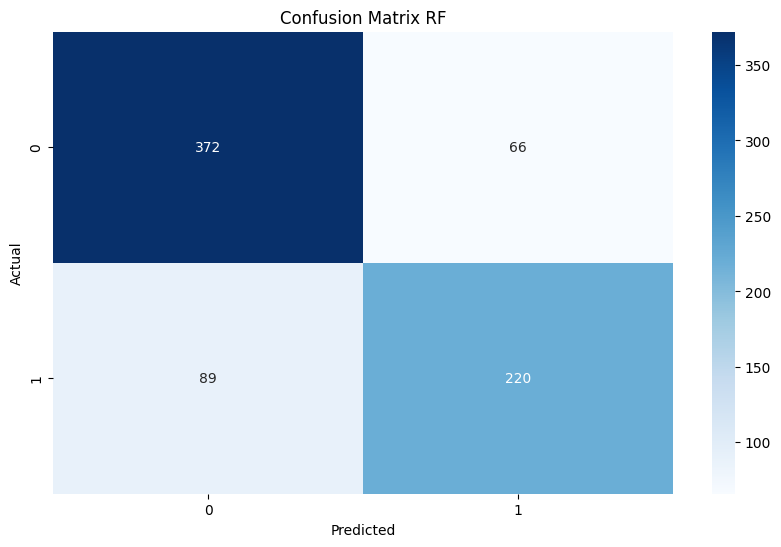

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)

print(f'Accuracy RF: {accuracy_rf}')
print('Classification Report RF:\n', report_rf)
print('Confusion Matrix RF:\n', conf_matrix_rf)

sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

In [ ]:
y_rf_pred = rf_classifier.predict(X_train)

accuracy_rf = accuracy_score(y_train, y_rf_pred)

report_rf = classification_report(y_train, y_rf_pred)

Scores_rf = {'Accuracy':round(accuracy_score(y_train, y_rf_pred),3),
          'F1_score':round(f1_score(y_train, y_rf_pred),3),
          'Recall':round(recall_score(y_train, y_rf_pred),3),
          'Precision':round(precision_score(y_train, y_rf_pred),3)}
df_rf=pd.DataFrame(data=Scores_rf,index=['RandomForest'])
df_rf

Accuracy  F1_score  Recall  Precision
RandomForest     0.942     0.931     0.9      0.964

Accuracy RF: 0.9421017402945113
Classification Report RF:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1697
           1       0.96      0.90      0.93      1291

    accuracy                           0.94      2988
   macro avg       0.95      0.94      0.94      2988
weighted avg       0.94      0.94      0.94      2988

Confusion Matrix RF:
 [[1653   44]
 [ 129 1162]]


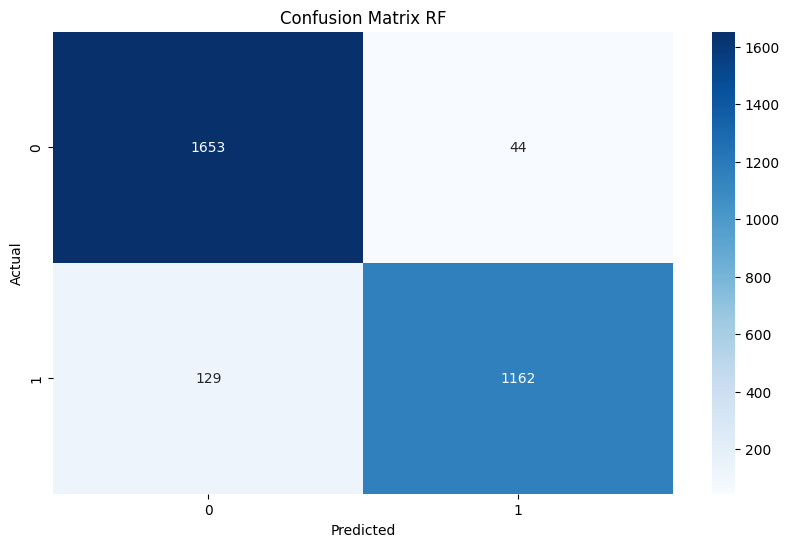

In [ ]:
conf_matrix_rf = confusion_matrix(y_train, y_rf_pred)

print(f'Accuracy RF: {accuracy_rf}')
print('Classification Report RF:\n', report_rf)
print('Confusion Matrix RF:\n', conf_matrix_rf)

sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

## ROC

In [ ]:
fpr_train

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.89275192e-04,
       5.89275192e-04, 1.17855038e-03, 1.17855038e-03, 1.76782557e-03,
       1.76782557e-03, 2.35710077e-03, 2.35710077e-03, 2.94637596e-03,
       2.94637596e-03, 3.53565115e-03, 3.53565115e-03, 4.12492634e-03,
       4.12492634e-03, 4.71420153e-03, 4.71420153e-03, 5.30347672e-03,
       5.30347672e-03, 5.89275192e-03, 5.89275192e-03, 6.48202711e-03,
       6.48202711e-03, 7.07130230e-03, 7.07130230e-03, 7.66057749e-03,
       7.66057749e-03, 8.24985268e-03, 8.24985268e-03, 8.83912787e-03,
       8.83912787e-03, 9.42840306e-03, 9.42840306e-03, 1.06069534e-02,
       1.06069534e-02, 1.11962286e-02, 1.11962286e-02, 1.17855038e-02,
       1.17855038e-02, 1.23747790e-02, 1.23747790e-02, 1.29640542e-02,
       1.29640542e-02, 1.41426046e-02, 1.41426046e-02, 1.47318798e-02,
       1.47318798e-02, 1.53211550e-02, 1.53211550e-02, 1.59104302e-02,
       1.59104302e-02, 1.64997054e-02, 1.64997054e-02, 1.70889806e-02,
      

In [ ]:
tpr_train

array([0.00000000e+00, 7.74593338e-04, 5.21301317e-01, 5.21301317e-01,
       5.39891557e-01, 5.39891557e-01, 5.87916344e-01, 5.87916344e-01,
       6.01859024e-01, 6.01859024e-01, 6.32068164e-01, 6.32068164e-01,
       7.18048025e-01, 7.18048025e-01, 7.31990705e-01, 7.31990705e-01,
       7.62199845e-01, 7.62199845e-01, 7.69945778e-01, 7.69945778e-01,
       7.71494965e-01, 7.71494965e-01, 7.86986832e-01, 7.86986832e-01,
       8.13323005e-01, 8.13323005e-01, 8.17195972e-01, 8.17195972e-01,
       8.21068939e-01, 8.21068939e-01, 8.31138652e-01, 8.31138652e-01,
       8.38884586e-01, 8.38884586e-01, 8.39659179e-01, 8.39659179e-01,
       8.41208366e-01, 8.41208366e-01, 8.46630519e-01, 8.46630519e-01,
       8.47405112e-01, 8.47405112e-01, 8.48954299e-01, 8.48954299e-01,
       8.49728892e-01, 8.49728892e-01, 8.54376452e-01, 8.54376452e-01,
       8.56700232e-01, 8.56700232e-01, 8.57474826e-01, 8.57474826e-01,
       8.59798606e-01, 8.59798606e-01, 8.68319132e-01, 8.68319132e-01,
      

0.9902876858830022
0.874421835054898


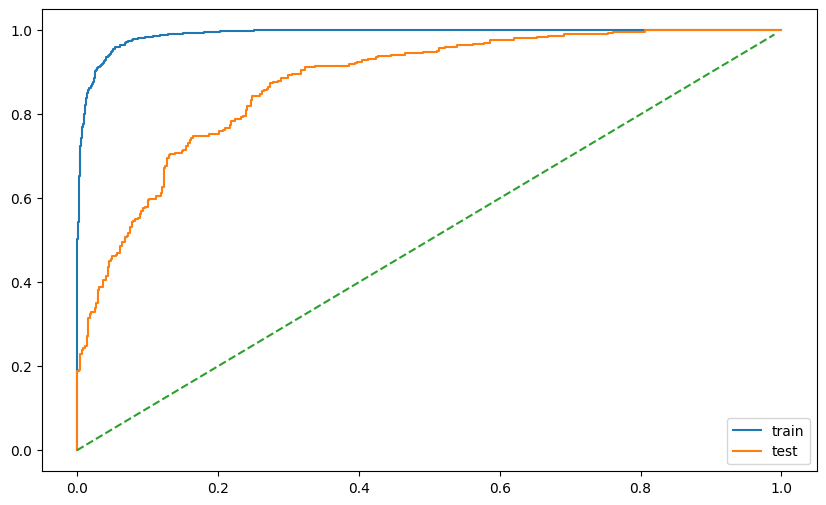

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

pred_train_proba = rf_classifier.predict_proba(X_train)[:,1]
pred_test_proba = rf_classifier.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train,pred_train_proba))
print(roc_auc_score(y_test,pred_test_proba))

fpr_train, tpr_train, thresholds =roc_curve(y_train, pred_train_proba)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, pred_test_proba)

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(fpr_train,tpr_train, label='train')
plt.plot(fpr_test,tpr_test,label='test')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.legend()
plt.show()

In [ ]:
#leaf
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,50,1):
    tree_1_classifier = DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train,y_train)
    tree_train_scores.append(tree_1_classifier.score(X_train,y_train))
    tree_test_scores.append(tree_1_classifier.score(X_test,y_test))

    rf_1_classifier = RandomForestClassifier(max_leaf_nodes=i, n_estimators=50).fit(X_train,y_train)
    rf_train_scores.append(rf_1_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_1_classifier.score(X_test,y_test))

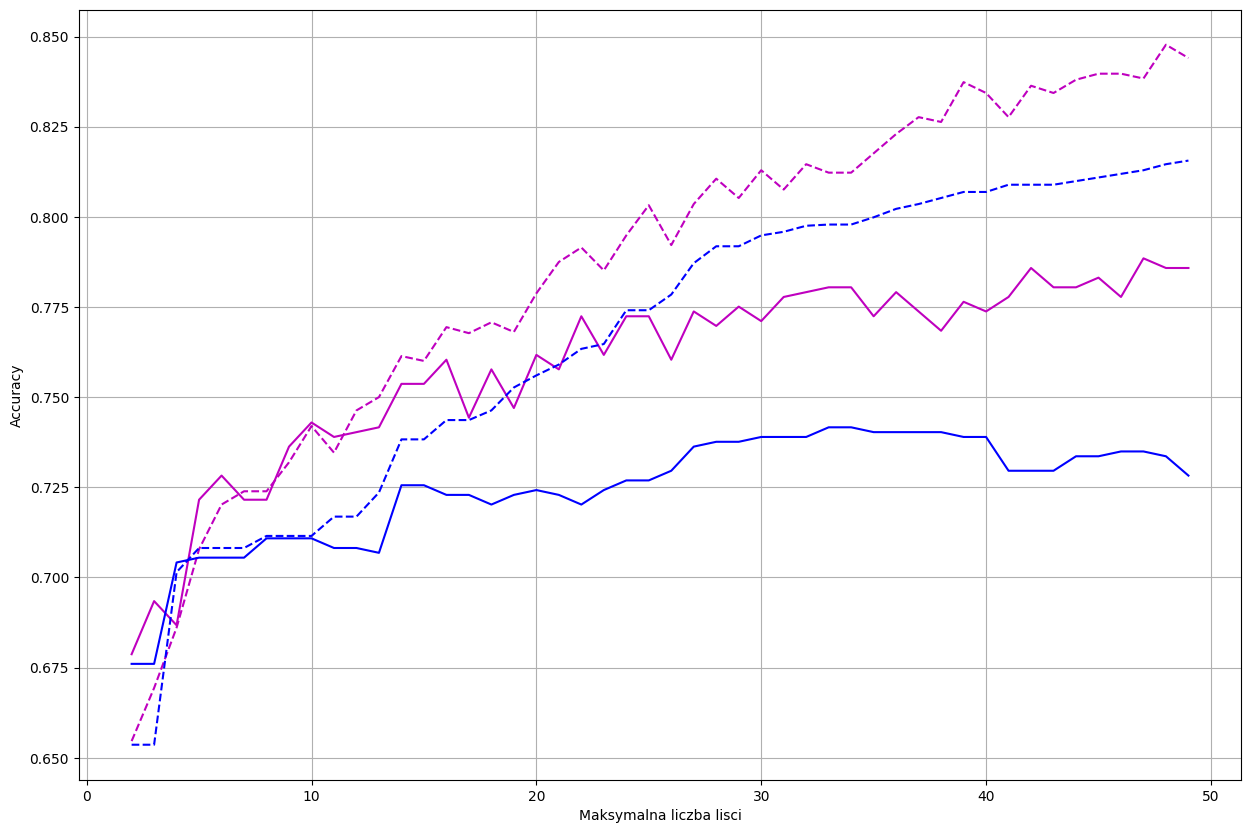

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna liczba lisci')
plt.ylabel('Accuracy')

plt.plot(range(2,50,1), rf_train_scores,'m--')
plt.plot(range(2,50,1), rf_test_scores, 'm')
plt.plot(range(2,50,1), tree_train_scores, 'b--')
plt.plot(range(2,50,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [ ]:
#max_deph

tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []

for i in range(2,15,1):
    tree_1_classifier = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
    tree_train_scores.append(tree_1_classifier.score(X_train,y_train))
    tree_test_scores.append(tree_1_classifier.score(X_test,y_test))

    rf_1_classifier = RandomForestClassifier(max_depth=i, n_estimators=50).fit(X_train,y_train)
    rf_train_scores.append(rf_1_classifier.score(X_train,y_train))
    rf_test_scores.append(rf_1_classifier.score(X_test,y_test))

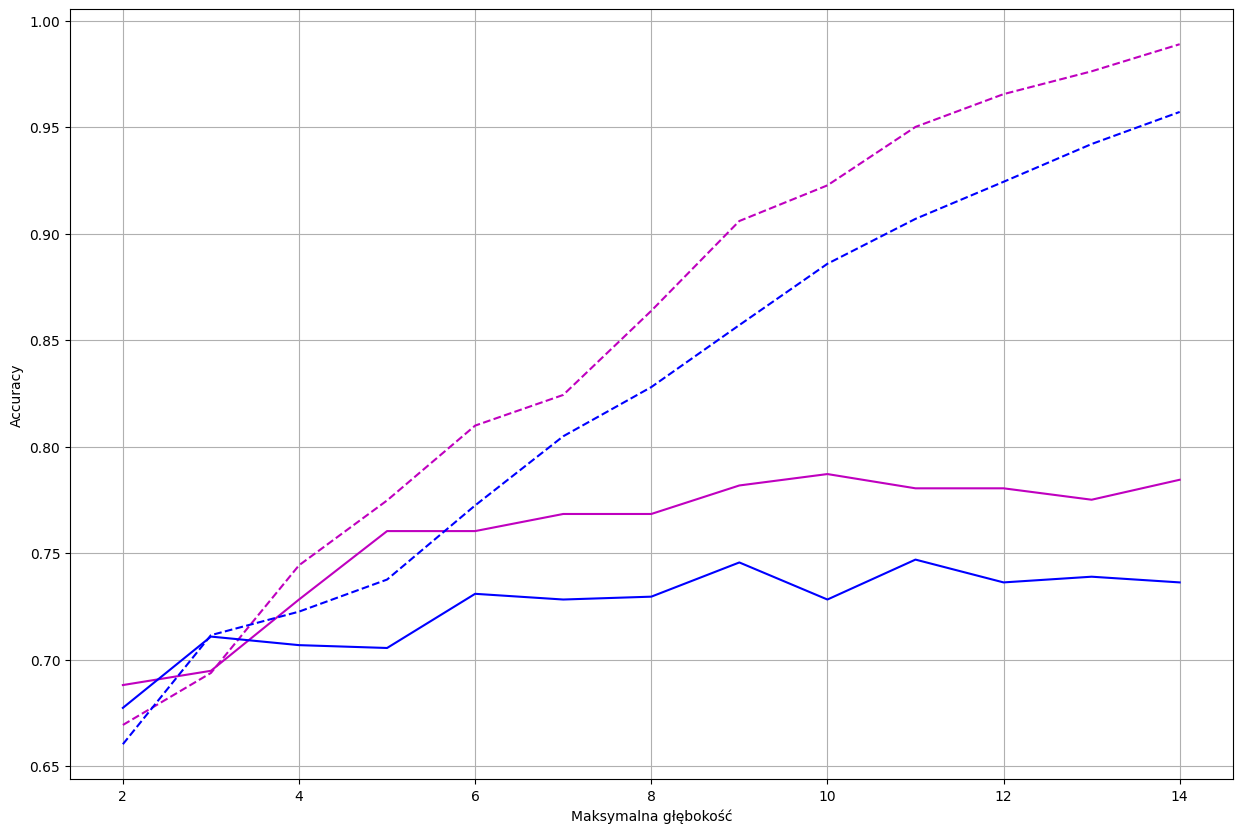

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Maksymalna głębokość')
plt.ylabel('Accuracy')

plt.plot(range(2,15,1), rf_train_scores,'m--')
plt.plot(range(2,15,1), rf_test_scores, 'm')
plt.plot(range(2,15,1), tree_train_scores, 'b--')
plt.plot(range(2,15,1), tree_test_scores, 'b')
plt.grid()
plt.show()

In [ ]:
model = RandomForestClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, 30, 40],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Najlepsze parametry: ', best_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Najlepsze parametry:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [ ]:
brf_classifier = grid_search.best_estimator_

In [ ]:
brf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=4)

In [ ]:
y_brf_pred = brf_classifier.predict(X_test)

In [ ]:
accuracy_brf = accuracy_score(y_test, y_brf_pred)

In [ ]:
report_brf = classification_report(y_test, y_brf_pred)

Accuracy BRF: 0.7898259705488622
Classification Report BRF:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       438
           1       0.76      0.73      0.74       309

    accuracy                           0.79       747
   macro avg       0.79      0.78      0.78       747
weighted avg       0.79      0.79      0.79       747

Confusion Matrix BRF:
 [[366  72]
 [ 84 225]]


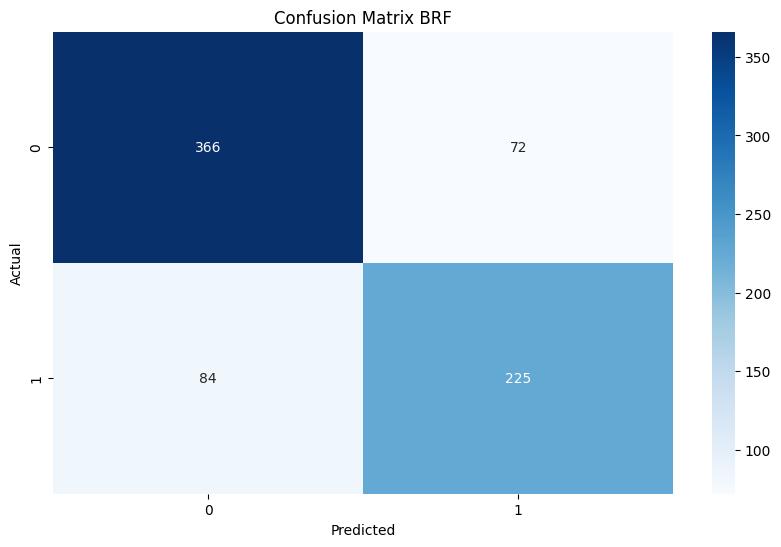

In [ ]:
conf_matrix_brf = confusion_matrix(y_test, y_brf_pred)

print(f'Accuracy BRF: {accuracy_rf}')
print('Classification Report BRF:\n', report_brf)
print('Confusion Matrix BRF:\n', conf_matrix_brf)

sns.heatmap(conf_matrix_brf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix BRF')
plt.show()

## EXTRA TREES CLASSIFIER

In [ ]:
X = df[["attention", "meditation", "delta", "theta", "lowAlpha", "highAlpha", "lowBeta", "highBeta", "lowGamma", "highGamma"]]
y = df['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

ext_clf = ExtraTreesClassifier()

grid_search = GridSearchCV(estimator=ext_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_ext_clf = grid_search.best_estimator_
ext_clf_pred = best_ext_clf.predict(X_test)

In [ ]:
ext_clf_pred = best_ext_clf.predict(X_test)

In [ ]:
accuracy_ext_clf = accuracy_score(y_test, ext_clf_pred)

In [ ]:
report_ext_clf = classification_report(y_test, ext_clf_pred)

Accuracy ETC: 0.7898259705488622
Classification Report ETC:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       438
           1       0.76      0.72      0.74       309

    accuracy                           0.79       747
   macro avg       0.78      0.78      0.78       747
weighted avg       0.79      0.79      0.79       747

Confusion Matrix ETC:
 [[367  71]
 [ 86 223]]


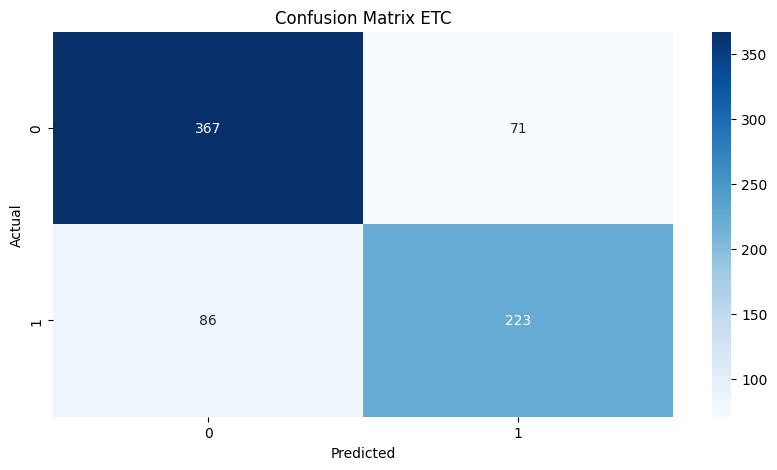

In [ ]:
conf_matrix_ext_clf = confusion_matrix(y_test, ext_clf_pred)

print(f'Accuracy ETC: {accuracy_ext_clf}')
print('Classification Report ETC:\n', report_ext_clf)
print('Confusion Matrix ETC:\n', conf_matrix_ext_clf)

sns.heatmap(conf_matrix_ext_clf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ETC')
plt.show()

In [ ]:
Scores_etc = {'Accuracy':round(accuracy_score(y_test, ext_clf_pred),3),
          'F1_score':round(f1_score(y_test, ext_clf_pred),3),
          'Recall':round(recall_score(y_test, ext_clf_pred),3),
          'Precision':round(precision_score(y_test, ext_clf_pred),3)}
df_etc=pd.DataFrame(data=Scores_etc,index=['ETC'])
df_etc

Accuracy  F1_score  Recall  Precision
ETC      0.79      0.74   0.722      0.759

In [ ]:
import lightgbm as lgb

params = {
    'objective': 'multiclass',
    'num_class': len(y.unique()),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'sub_feature': 0.5,
    'num_leaves': 31,
    'min_data': 50,
    'max_depth': -1
}

d_train = lgb.Dataset(X_train, label = y_train)

In [ ]:
lgb = lgb.train(params, d_train, 100)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2160
[LightGBM] [Info] Number of data points in the train set: 2988, number of used features: 10
[LightGBM] [Info] Start training from score -0.565742
[LightGBM] [Info] Start training from score -0.839187


In [ ]:
lgb_pred = lgb.predict(X_test)

In [ ]:
lgb_pred_max = [max(enumerate(val), key=lambda x: x[1])[0] for val in lgb_pred]

In [ ]:
accuracy_lgb = accuracy_score(y_test, lgb_pred_max)

In [ ]:
report_lgb = classification_report(y_test, lgb_pred_max)

Accuracy LGB: 0.7938420348058902
Classification Report LGB:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       438
           1       0.76      0.73      0.75       309

    accuracy                           0.79       747
   macro avg       0.79      0.79      0.79       747
weighted avg       0.79      0.79      0.79       747

Confusion Matrix LGB:
 [[366  72]
 [ 82 227]]


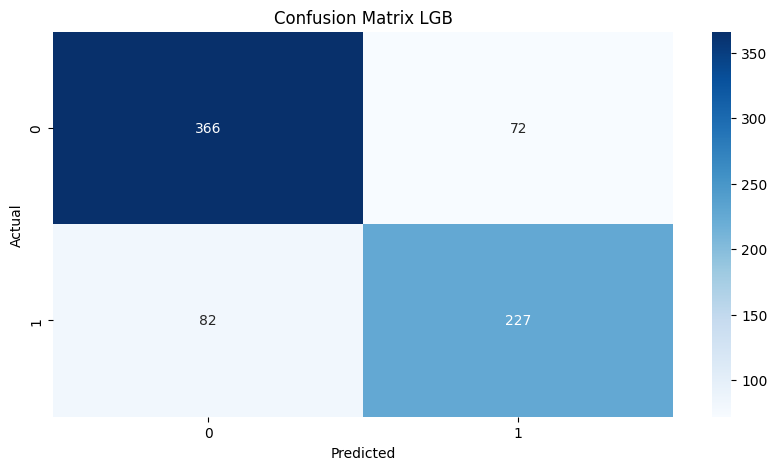

In [ ]:
conf_matrix_lgb = confusion_matrix(y_test, lgb_pred_max)

print(f'Accuracy LGB: {accuracy_lgb}')
print('Classification Report LGB:\n', report_lgb)
print('Confusion Matrix LGB:\n', conf_matrix_lgb)

sns.heatmap(conf_matrix_lgb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LGB')
plt.show()

In [ ]:
Scores_lgb = {'Accuracy':round(accuracy_score(y_test, lgb_pred_max),3),
          'F1_score':round(f1_score(y_test, lgb_pred_max),3),
          'Recall':round(recall_score(y_test, lgb_pred_max),3),
          'Precision':round(precision_score(y_test, lgb_pred_max),3)}
df_lgb=pd.DataFrame(data=Scores_etc,index=['LGB'])
df_lgb

Accuracy  F1_score  Recall  Precision
LGB      0.79      0.74   0.722      0.759

## ADA BOOST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

tree = RandomForestClassifier(max_depth = 10)
clf = AdaBoostClassifier(tree)
params = {
    'n_estimators' : [2,5,10,15,20],
    'learning_rate' : [0.01,0.1,1,10]
}
random_search = RandomizedSearchCV(clf, params, n_iter = 10, cv = 5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=10)),
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10],
                                        'n_estimators': [2, 5, 10, 15, 20]})

In [ ]:
random_search.best_params_

{'n_estimators': 5, 'learning_rate': 1}

In [ ]:
ada_classifier = AdaBoostClassifier(n_estimators = 15, learning_rate = 1)

In [ ]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=15)

In [ ]:
y_ada_pred = ada_classifier.predict(X_test)

In [ ]:
accuracy_ada = accuracy_score(y_test, y_ada_pred)

In [ ]:
report_ada = classification_report(y_test, y_ada_pred)

NameError: ignored

Accuracy ADA: 0.7028112449799196
Classification Report ADA:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       438
           1       0.74      0.43      0.55       309

    accuracy                           0.70       747
   macro avg       0.72      0.66      0.66       747
weighted avg       0.71      0.70      0.68       747

Confusion Matrix ADA:
 [[392  46]
 [176 133]]


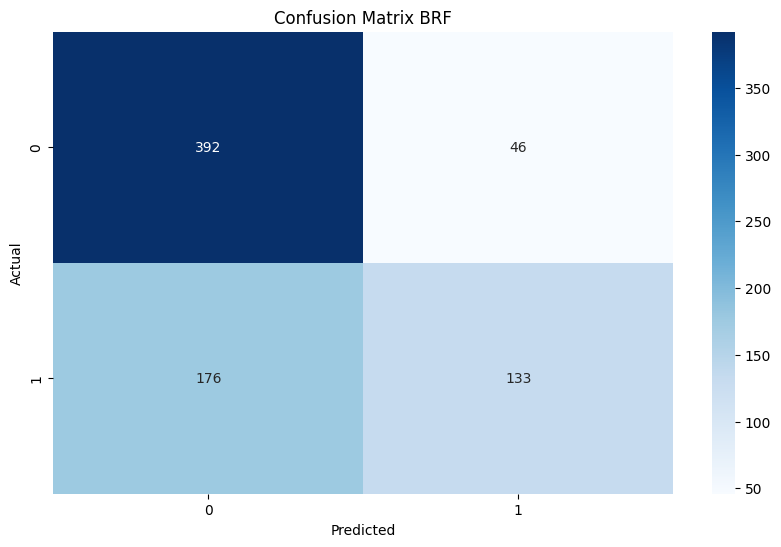

In [ ]:
conf_matrix_ada = confusion_matrix(y_test, y_ada_pred)

print(f'Accuracy ADA: {accuracy_ada}')
print('Classification Report ADA:\n', report_ada)
print('Confusion Matrix ADA:\n', conf_matrix_ada)

sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix ADA')
plt.show()

## SVM

In [ ]:
X = df[["attention", "meditation", "delta", "theta", "lowAlpha", "highAlpha", "lowBeta", "highBeta", "lowGamma", "highGamma"]]
y = df['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(C=1.0, kernel='rbf')

svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
y_svm_pred = svm_classifier.predict(X_test)

In [ ]:
svm_classifier.score(X_test, y_test)

0.7402945113788487

In [ ]:
accuracy_svm = accuracy_score(y_test, y_svm_pred)

In [ ]:
report_svm = classification_report(y_test, y_svm_pred)

In [ ]:
Scores_svm = {'Accuracy':round(accuracy_score(y_test, y_svm_pred),3),
          'F1_score':round(f1_score(y_test, y_svm_pred),3),
          'Recall':round(recall_score(y_test, y_svm_pred),3),
          'Precision':round(precision_score(y_test, y_svm_pred),3)}
df_svm=pd.DataFrame(data=Scores_svm,index=['SVM'])
df_svm

Accuracy  F1_score  Recall  Precision
SVM      0.74     0.713    0.78      0.657

Accuracy SVM: 0.7402945113788487
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       438
           1       0.66      0.78      0.71       309

    accuracy                           0.74       747
   macro avg       0.74      0.75      0.74       747
weighted avg       0.75      0.74      0.74       747

Confusion Matrix SVM:
 [[312 126]
 [ 68 241]]


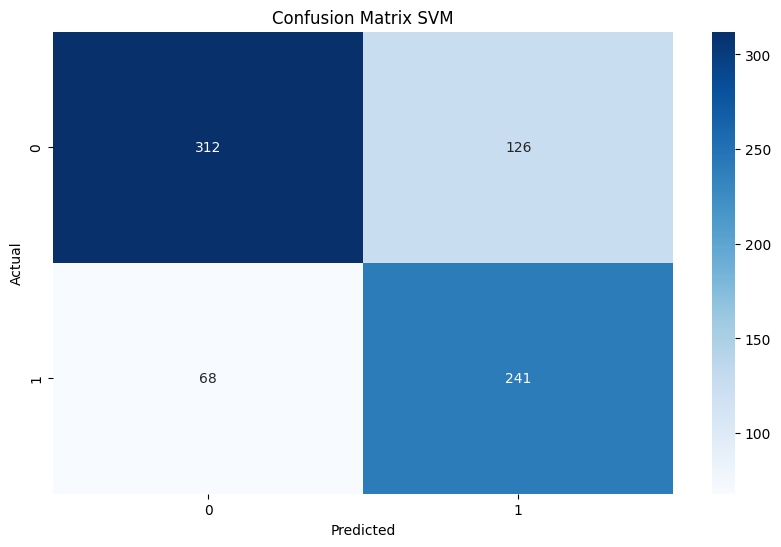

Accuracy  F1_score  Recall  Precision
SVM      0.74     0.713    0.78      0.657

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_svm_pred)

print(f'Accuracy SVM: {accuracy_svm}')
print('Classification Report SVM:\n', report_svm)
print('Confusion Matrix SVM:\n', conf_matrix_svm)

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()
df_rf=pd.DataFrame(data=Scores_svm,index=['SVM'])
df_rf

## GRID SEACH

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
svm_1_classifier = SVC(C=100, gamma='scale', kernel='rbf')

In [ ]:
svm_1_classifier.fit(X_train, y_train)

SVC(C=100)

In [ ]:
y_svm_1_pred = svm_1_classifier.predict(X_test)

In [ ]:
accuracy_svm_1 = accuracy_score(y_test, y_svm_1_pred)

In [ ]:
report_svm_1 = classification_report(y_test, y_svm_1_pred)

Accuracy SVM: 0.7028112449799196
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       438
           1       0.74      0.43      0.55       309

    accuracy                           0.70       747
   macro avg       0.72      0.66      0.66       747
weighted avg       0.71      0.70      0.68       747

Confusion Matrix SVM:
 [[392  46]
 [176 133]]


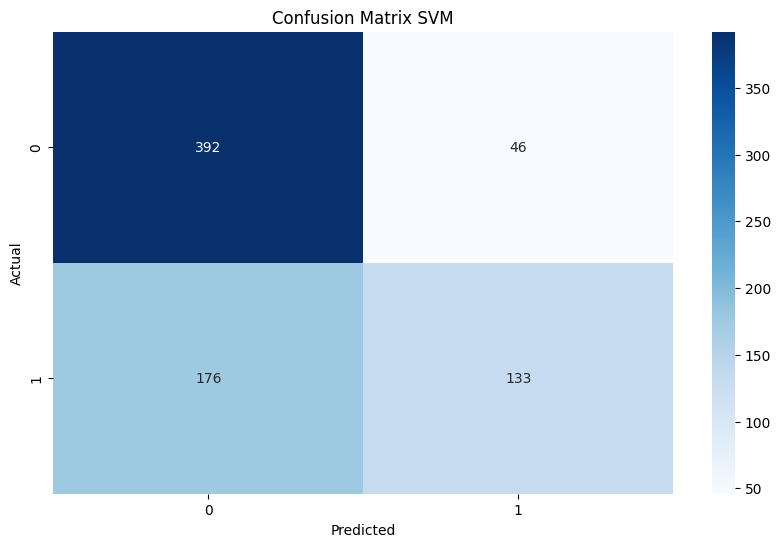

In [ ]:
conf_matrix_svm_1 = confusion_matrix(y_test, y_svm_1_pred)

print(f'Accuracy SVM: {accuracy_ada}')
print('Classification Report SVM:\n', report_ada)
print('Confusion Matrix SVM:\n', conf_matrix_ada)

sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.show()

## Podsumowanie

In [ ]:
result = pd.concat([df_lr,df_kn, df_tree, df_rf, df_svm])
result

NameError: ignored

In [ ]:
print("Projekt końcowy")

Projekt końcowy
